# Code to Reproduce Results for the LPC-Responsive Endothelial Cell Data

This code is used to reproduce the results for the LPC-Responsive Endothelial Cell dataset.

## Requirements
- The code needs to be run on **Google Colab** with an **A100 GPU** for optimal performance.

## Additional Resources
- At the end of the `.ipynb` notebook, you will find:
  - **Links to Pretrained Models and the Main Results**

In [1]:
!pip install umap-learn
!pip install scanpy
!pip install bbknn
!pip install palettable
!pip install hdf5plugin
!pip install harmonypy
!pip install gdown
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=7ca6ab72910565eca51fc902a6721e8c0d6ea80112b3bd54595956644799aae9
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 32.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp311-cp311-linu

In [2]:
import warnings
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings('ignore')

import gdown
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import palettable
from sklearn import datasets
#import anndata as ad
import scanpy as sc
from anndata import AnnData
import anndata as ad
import pandas as pd
from scipy.sparse import issparse
import numpy as np
import pooch
from matplotlib.pyplot import rc_context
import os

import scanpy.external as sce
from matplotlib.pyplot import rc_context
import h5py
import hdf5plugin
import matplotlib as mpl
from matplotlib import rcParams

In [3]:
class ScPyPy:
    @staticmethod
    def adv_umap(adata, color=None, mask_obs=None, gene_symbols=None, use_raw=None, sort_order=True, edges=False,
        edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None,
        components=None, dimensions=None, layer=None, projection='2d', scale_factor=None, color_map="plasma",
        cmap=None, palette='tab20b', na_color='lightgray', na_in_legend=True, size=None, frameon=False,
        legend_fontsize=None, legend_fontweight='bold', legend_loc='right margin', legend_fontoutline=None,
        colorbar_loc='right', vmax=None, vmin=None, vcenter=None, norm=None, add_outline=False,
        outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, title=None,
        show=False, save=None, ax=None, return_fig=None, marker='.',min_ax_fontsize = 6,min_ax_lw = 2, **kwargs):
        """
        Visualize UMAP projections of the data with the option to save the output.

        Example:
        adv_umap(adata, color_feature, palette='tab20b', save=None, save_format='png')
        Parameters:
        adata (AnnData): Annotated data matrix.
        color_feature (str): Column name in adata.obs to use for coloring.
        palette (str, optional): Color palette name. Defaults to 'tab20b'.
        save (str, optional): If provided, save the figure to this file name within a 'figures' directory.
        save_format (str, optional): Format to save the figure in, e.g., 'png', 'pdf', etc. Defaults to 'png'.
        """
        fig, main_ax = plt.subplots()
        #sc.pl.umap(adata, color=[color_feature], frameon=False, ax=main_ax, show=False,color_map=color_map, palette=palette)
        sc.pl.umap(
        adata=adata,
        ax=main_ax,
        color=color,
        mask_obs=mask_obs,
        gene_symbols=gene_symbols,
        use_raw=use_raw,
        sort_order=sort_order,
        edges=edges,
        edges_width=edges_width,
        edges_color=edges_color,
        neighbors_key=neighbors_key,
        arrows=arrows,
        arrows_kwds=arrows_kwds,
        groups=groups,
        components=components,
        dimensions=dimensions,
        layer=layer,
        projection=projection,
        scale_factor=scale_factor,
        color_map=color_map,
        cmap=cmap,
        palette=palette,
        na_color=na_color,
        na_in_legend=na_in_legend,
        size=size,
        frameon=frameon,
        legend_fontsize=legend_fontsize,
        legend_fontweight=legend_fontweight,
        legend_loc=legend_loc,
        legend_fontoutline=legend_fontoutline,
        colorbar_loc=colorbar_loc,
        vmax=vmax,
        vmin=vmin,
        vcenter=vcenter,
        norm=norm,
        add_outline=add_outline,
        outline_width=outline_width,
        outline_color=outline_color,
        ncols=ncols,
        hspace=hspace,
        wspace=wspace,
        title=title,
        show=show,
        save=save,
        return_fig=return_fig,
        marker=marker,
        **kwargs  # 允许传递额外的参数
              )
        min_ax = fig.add_axes([0.0, 0.0, 0.6, 0.6])  # xmin, ymin, dx, dy
        min_ax.set_xlim(0, 2)
        min_ax.set_ylim(0, 2)
        min_ax.axis('off')
        min_ax.plot([0.5, 0.9], [0.5, 0.5], lw=min_ax_lw, color='k')
        min_ax.plot([0.5, 0.5], [0.5, 0.9], lw=min_ax_lw, color='k')
        min_ax.text(0.72, 0.38, 'UMAP1', horizontalalignment='center', verticalalignment='center', fontsize=min_ax_fontsize, fontweight='bold')
        min_ax.text(0.38, 0.72, 'UMAP2', horizontalalignment='center', verticalalignment='center', fontsize=min_ax_fontsize, rotation=90, fontweight='bold')

        if save:
            os.makedirs('figures', exist_ok=True)
            file_path = os.path.join('figures', f'{save}.{save_format}')
            plt.savefig(file_path, format=save_format, dpi=300)
            print(f"Saved figure as {file_path}")

        plt.show()
        plt.close(fig)

    @staticmethod
    def anno_agent(adata, cell_type, cluster_key="leiden_res_ori_0.50"):
        """
        Generate and return a summary of top marker genes for clusters defined in the data.

        Example:
        anno_agent(adata, cell_type = 'RCC', cluster_key="leiden_res_ori_0.50")
        Parameters:
        adata (AnnData): Annotated data matrix.
        cell_type (str): Description of the cell type to annotate.
        cluster_key (str, optional): Key in adata.obs used for clustering. Defaults to 'leiden_res_ori_0.50'.
        """
        clusters = sorted(adata.obs[cluster_key].unique(), key=lambda x: float(x) if str(x).isdigit() else x)
        output_template = "{}: {}"
        output_lines = []

        for cluster in clusters:
            df = sc.get.rank_genes_groups_df(adata, group=cluster).head(20)
            gene_names = df['names'].tolist()
            line = output_template.format(cluster, '、'.join(gene_names))
            output_lines.append(line)

        content = (
            f"Identify cell types of {cell_type} using the following markers. "
            "The output requirement is in the format (cluster: cell type)."
            "Identify one cell type for each row. Attention - Only provide the cell type name,"
            "no further explanation is required ： \n"
            + " \n".join(output_lines)
        )

        return content




In [4]:
os.environ['HDF5_PLUGIN_PATH'] = '/usr/local/hdf5/lib/plugin'

# read data

In [50]:
file_id = "1OIgcHZMWP9d9qP5GU4vwYE4Z8CeiHHX1"
output = "GSE276570_endo_object.h5ad"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1OIgcHZMWP9d9qP5GU4vwYE4Z8CeiHHX1
To: /content/Deep-scSTAR/GSE276570_endo_object.h5ad
100%|██████████| 32.1M/32.1M [00:01<00:00, 30.1MB/s]


'GSE276570_endo_object.h5ad'

In [51]:
adata = sc.read_h5ad(output)

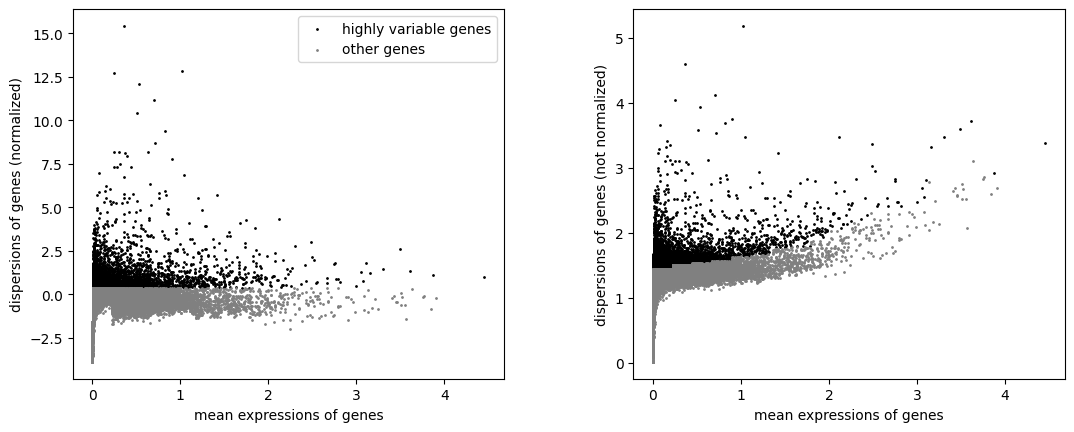

In [52]:
adata = adata.raw.to_adata()
adata.raw = adata
sc.pp.highly_variable_genes(adata, n_top_genes=4000)
sc.pl.highly_variable_genes(adata)
adata = adata[:, adata.var['highly_variable']]

In [53]:
adata.obs['Condition'] = adata.obs['Condition'].astype('category')
condition_mapping = {0: 'PBS', 1: 'LPC'}
adata.obs['Condition'] = adata.obs['Condition'].map(condition_mapping).astype('category')
adata.obs['Condition'].value_counts()

,count
Condition,
PBS,447
LPC,443


In [54]:
sc.tl.pca(adata)

In [55]:
def integrate_and_cluster(adata, method='harmony',batch_key = 'sample'):
    if method.lower() == 'harmony':
        print(">> Using Harmony for batch integration...")
        sce.pp.harmony_integrate(adata, batch_key)
        sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50, use_rep='X_pca_harmony')
    elif method.lower() == 'bbknn':
        print(">> Using BBKNN for batch integration...")
        import bbknn
        sc.external.pp.bbknn(
            adata,
            batch_key=batch_key)
    else:
        print(">> No batch integration (using standard neighbors)...")
        sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50, use_rep='X_pca')
    sc.tl.umap(adata)
    return adata

# method = "harmony"
# method = "bbknn"
# method = "none"
method = "bbknn"
adata = integrate_and_cluster(adata, method=method,batch_key = 'Condition')

>> Using BBKNN for batch integration...


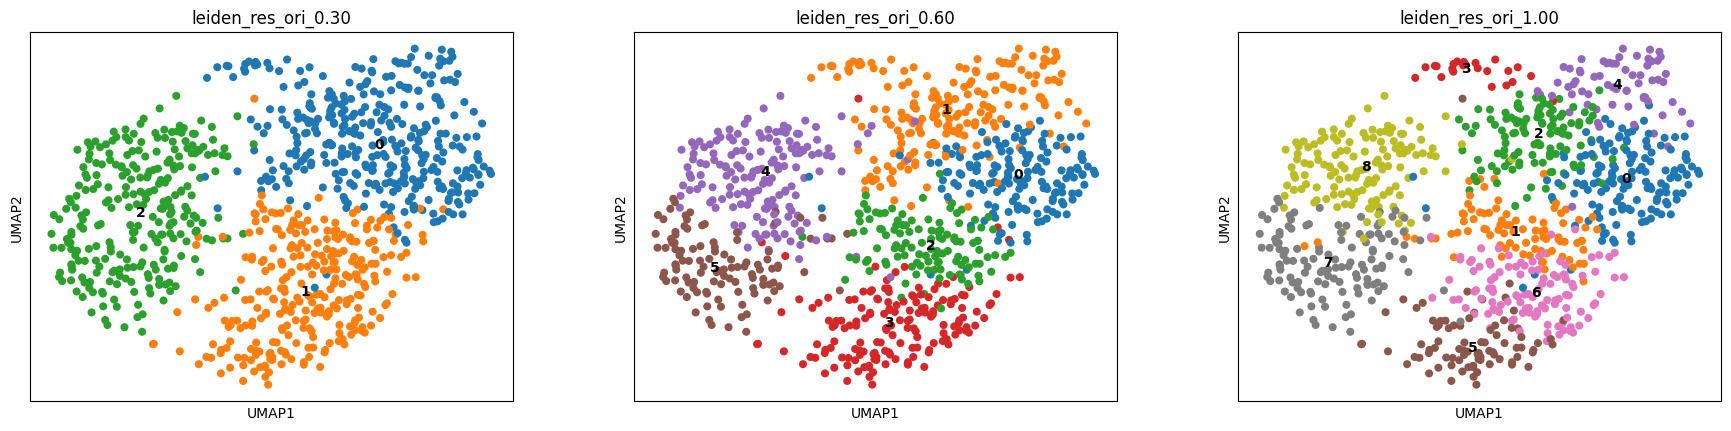

In [56]:
for res in [0.3, 0.6, 1.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_ori_{res:4.2f}", resolution=res, flavor="igraph"
    )
sc.pl.umap(
    adata,
    color=["leiden_res_ori_0.30", "leiden_res_ori_0.60", "leiden_res_ori_1.00"],
    legend_loc="on data",
)

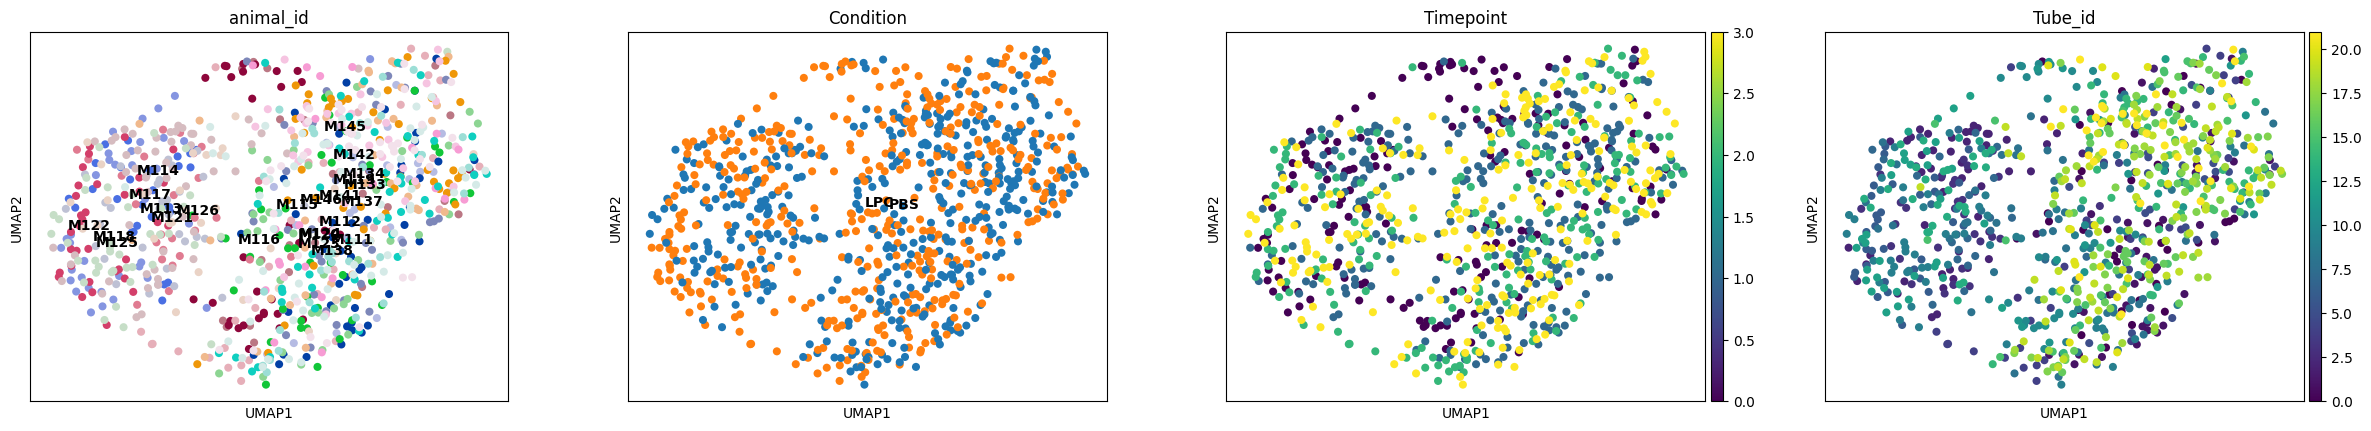

In [57]:
sc.pl.umap(
    adata,
    color=["animal_id", "Condition", "Timepoint", "Tube_id"],
    legend_loc="on data",
)

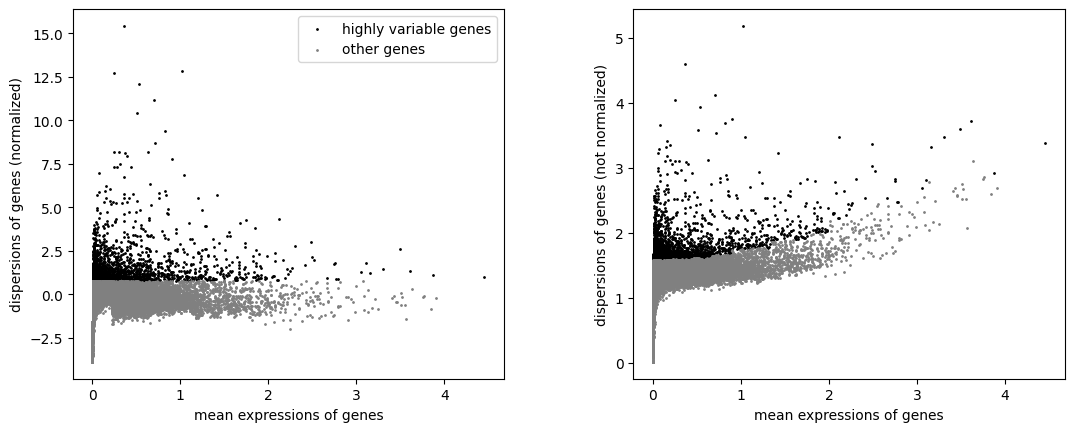

In [58]:
adata2 = sc.read_h5ad(output)
adata2 = adata2.raw.to_adata()
adata2.raw = adata2
sc.pp.highly_variable_genes(adata2, n_top_genes=2000)
sc.pl.highly_variable_genes(adata2)
adata2 = adata2[:, adata2.var['highly_variable']]


adata2.obs['Condition'] = adata2.obs['Condition'].astype('category')
condition_mapping = {0: 'PBS', 1: 'LPC'}
adata2.obs['Condition'] = adata2.obs['Condition'].map(condition_mapping).astype('category')


In [59]:
path = "/content/Deep-scSTAR/inputs"

adata_Case = adata2[adata2.obs['Condition'] == 'LPC', :].copy()
adata_Control = adata2[adata2.obs['Condition'] == 'PBS', :].copy()

In [60]:
adata_Control

AnnData object with n_obs × n_vars = 447 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'animal_id', 'Condition', 'Timepoint', 'Tube_id', 'Genotype', 'percent.mt', 'RNA_snn_res.0.2', 'seurat_clusters', 'bc', 'RNA_snn_res.0.5'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'hvg'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances'

In [61]:
import os
os.chdir('/content/')

In [62]:
!git clone https://github.com/Hao-Zou-lab/Deep-scSTAR.git

fatal: destination path 'Deep-scSTAR' already exists and is not an empty directory.


In [63]:
adataCase = AnnData(X=adata_Case.X,
                    obs=pd.DataFrame(index=adata_Case.obs_names),
                    var=pd.DataFrame(index=adata_Case.var_names))



save_path = os.path.join(path, 'case.h5ad')
adataCase.write(save_path)


adataControl = AnnData(X=adata_Control.X,
                    obs=pd.DataFrame(index=adata_Control.obs_names),
                    var=pd.DataFrame(index=adata_Control.var_names))



save_path = os.path.join(path, 'ctr.h5ad')
adataControl.write(save_path)

# DscSTAR

In [19]:
os.chdir('/content/Deep-scSTAR/')

# Parameter Settings

To modify the parameters, open the following file:  
`/content/Deep-scSTAR/run_DscSTAR.py`

## Hyperparameters

- **Data Preprocessing Method:** `mc`
- **Autoencoder Type:** `512`
- **Batch Size:** `50` (Batch size for each cluster)
- **Number of Epochs:** `800`
- **Base Learning Rate:** `1e-3`
- **Learning Rate Step Decay:** `40` (Step decay for learning rates)
- **Momentum:** `0.9`
- **L2 Decay:** `2e-5`
- **Gamma:** `10.0` (Regularization factor between reconstruction and transfer learning, typically in the range of `10-50`)
- **Log Interval:** `40`


In [20]:
!python run_DscSTAR.py --f "h5ad" --s "h5ad"\
--data-folder "inputs/" \
--input-1 "case.h5ad" \
--input-2 "ctr.h5ad" \
--output-1 "case.out.h5ad" \
--output-2 "ctr.out.h5ad" \
--output-folder "outputs/"

2025-02-03 12:38:41.357520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738586321.379288    2998 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738586321.385947    2998 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(2000, 443)
(2000, 447)
read done
[0.01150712 0.01169069 0.00198335 ... 0.00407349 0.00209233 0.00217989]
preprocess done
The shape of the gene_exp is: (2000, 890)
[0.01150712 0.01169069 0.00198335 ... 0.00407349 0.00209233 0.00217989]
batch_labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [21]:
adataCase_out=sc.read_h5ad('/content/Deep-scSTAR/outputs/case.out.h5ad')

In [22]:
adataCase_out = adataCase_out.T
X_processed = adataCase_out.X

adataCase_out.obs = adata_Case.obs.copy()
adataCase_out.var = adata_Case.var.copy()

adataCase_out.uns = adata_Case.uns.copy()
adataCase_out.obsp = adata_Case.obsp.copy()
adataCase_out.varp = adata_Case.varp.copy()

adataCase_out.X = X_processed

In [23]:
adataControl_out=sc.read_h5ad('/content/Deep-scSTAR/outputs/ctr.out.h5ad')

In [24]:
adataControl_out = adataControl_out.T
X_processed = adataControl_out.X

adataControl_out.obs = adata_Control.obs.copy()
adataControl_out.var = adata_Control.var.copy()

adataControl_out.uns = adata_Control.uns.copy()
adataControl_out.obsp = adata_Control.obsp.copy()
adataControl_out.varp = adata_Control.varp.copy()

adataControl_out.X = X_processed

# **Dsc**

In [25]:
adata_merged = ad.concat([adataCase_out, adataControl_out], axis=0)

In [26]:
sc.pp.highly_variable_genes(adata_merged, n_top_genes=2000)

In [27]:
adata_merged.raw = adata_merged # adata = adata.raw.to_adata()

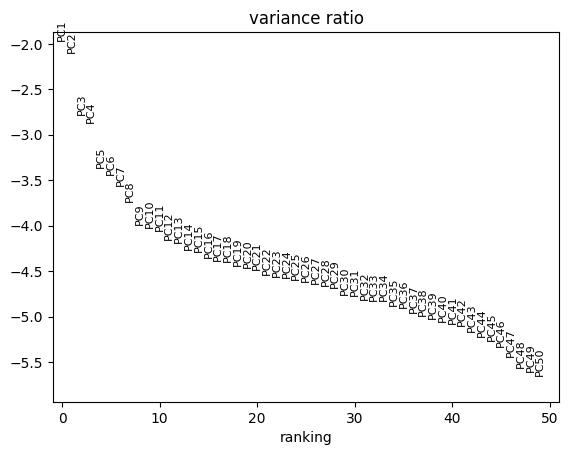

In [28]:
sc.tl.pca(adata_merged)
sc.pl.pca_variance_ratio(adata_merged, n_pcs=50, log=True)

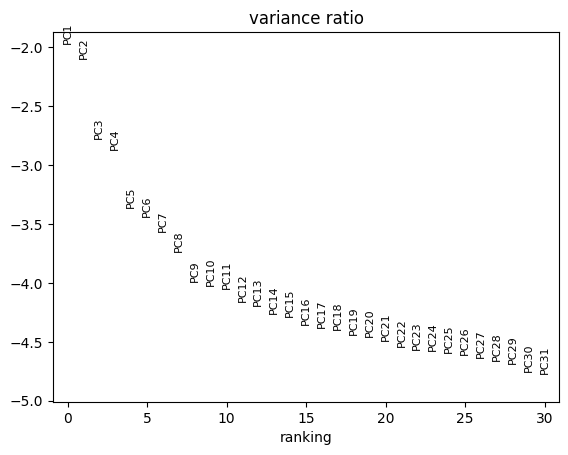

In [29]:
sc.pl.pca_variance_ratio(adata_merged, log=True)
sc.pp.neighbors(adata_merged, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_merged)

In [30]:
def integrate_and_cluster(adata, method='harmony',batch_key = 'sample'):

    if method.lower() == 'harmony':
        print(">> Using Harmony for batch integration...")
        sce.pp.harmony_integrate(adata, batch_key)
        sc.pp.neighbors(adata, n_pcs=40, use_rep='X_pca_harmony')
    elif method.lower() == 'bbknn':
        print(">> Using BBKNN for batch integration...")
        import bbknn
        sc.external.pp.bbknn(
            adata,
            batch_key=batch_key)
    else:
        print(">> No batch integration (using standard neighbors)...")
        sc.pp.neighbors(adata, n_pcs=30, use_rep='X_pca')

    sc.tl.umap(adata)


    return adata

# method = "harmony"
# method = "bbknn"
# method = "none"   # or 其他随便的字符，意味着不做批次整合
method = "none"
adata_merged = integrate_and_cluster(adata_merged, method=method,batch_key = 'animal_id')


>> No batch integration (using standard neighbors)...


In [31]:
for res in [0.02, 0.3, 0.4]:
    sc.tl.leiden(
        adata_merged, key_added=f"leiden_res_ori_{res:4.2f}", resolution=res, flavor="igraph"
    )


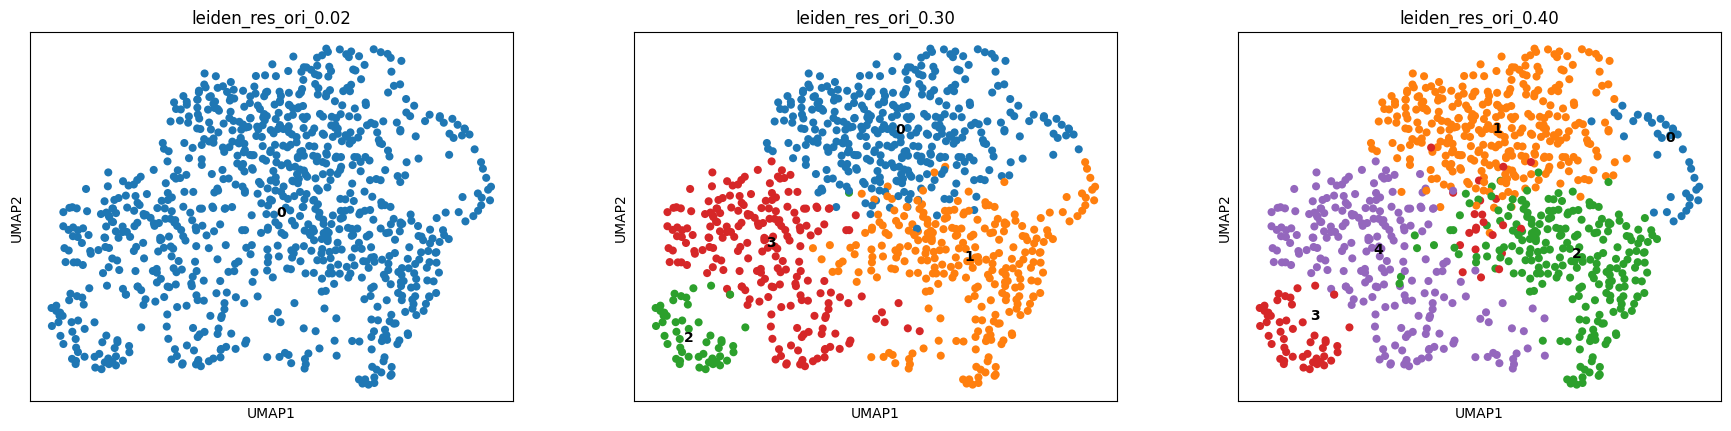

In [32]:
sc.pl.umap(
    adata_merged,
    color=["leiden_res_ori_0.02", "leiden_res_ori_0.30", "leiden_res_ori_0.40"],
    legend_loc="on data",
)

In [33]:

adata_merged.obs["Dsc"] = adata_merged.obs["leiden_res_ori_0.40"].map(
    {
        "0": "Dsc_C0",
        "1": "Dsc_C1",
        "2": "Dsc_C2",
        "3": "Dsc_C3",
        "4": "Dsc_C4",
        "5": "Dsc_C5"
    }
)

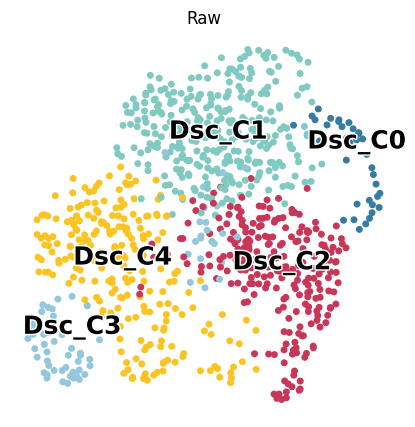

In [34]:
#Fig6a
custom_palette = ['#357ba2', '#80cac1', '#c83658','#94c6de', '#fcc422']
adata_merged.obs['Dsc'] = pd.Categorical(adata_merged.obs['Dsc'], ordered=True)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_merged,
        color="Dsc",
        legend_fontsize=18,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette=custom_palette,
        wspace=0.5,
        add_outline=False,
        size=100,
        legend_loc="on data",
        save="_Dsc_Dsc_cluster.pdf",
        alpha = 1
    )

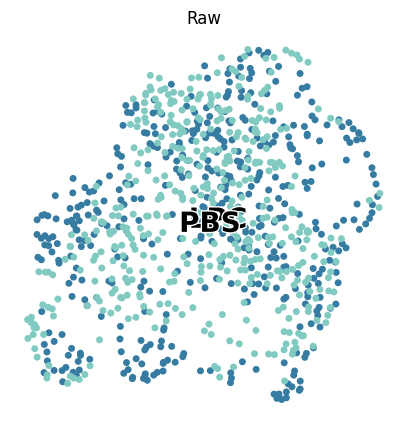

In [35]:

custom_palette = ['#357ba2', '#80cac1', '#c83658','#94c6de', '#fcc422']
adata_merged.obs['Condition'] = pd.Categorical(adata_merged.obs['Condition'], ordered=True)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_merged,
        color="Condition",
        legend_fontsize=20,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette=custom_palette,
        wspace=0.5,
        add_outline=False,
        size=100,
        legend_loc="on data",
        save="_perturbed_Dsc_cluster.pdf",
        alpha = 1
    )


In [64]:
sample_names = adata_merged.obs.index
leiden_categories = adata_merged.obs['Dsc']

leiden_categories = adata_merged.obs['Dsc']

leiden_df = pd.DataFrame({
    'Dsc': leiden_categories
}, index=sample_names)

adata.obs['Dsc'] = leiden_df.loc[adata.obs.index, 'Dsc']

print(adata.obs.head())

                                                             orig.ident  \
2_ACCATTTCAACTGCTA-1  201113_pDEMYELINsMMrCorpusCallosumAiM115d20111...   
2_ACGTAGTGTAACAAGT-1  201113_pDEMYELINsMMrCorpusCallosumAiM115d20111...   
2_AGAAATGGTGTGGACA-1  201113_pDEMYELINsMMrCorpusCallosumAiM115d20111...   
2_AGCGTCGAGCATGCAG-1  201113_pDEMYELINsMMrCorpusCallosumAiM115d20111...   
2_ATGCCTCCATGATGCT-1  201113_pDEMYELINsMMrCorpusCallosumAiM115d20111...   

                      nCount_RNA  nFeature_RNA animal_id Condition  Timepoint  \
2_ACCATTTCAACTGCTA-1      3020.0          1822      M115       PBS          0   
2_ACGTAGTGTAACAAGT-1      1583.0          1082      M115       PBS          0   
2_AGAAATGGTGTGGACA-1      7265.0          3171      M115       PBS          0   
2_AGCGTCGAGCATGCAG-1      2098.0          1321      M115       PBS          0   
2_ATGCCTCCATGATGCT-1      4454.0          2327      M115       PBS          0   

                      Tube_id  Genotype  percent.mt  RNA_snn_r

In [65]:
folder_name = 'DsTOoRI'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

downstream_path = os.path.abspath(folder_name)
sc.settings.figdir = downstream_path

# Dsc to ori

In [66]:
#none
adata.obs["Ori"] = adata.obs["leiden_res_ori_0.60"].map(
    {
        "0": "Ori_C0",
        "1": "Ori_C1",
        "2": "Ori_C2",
        "3": "Ori_C3",
        "4": "Ori_C4",
        "5": "Ori_C5"
    }
)

In [67]:
adata = adata.raw.to_adata()

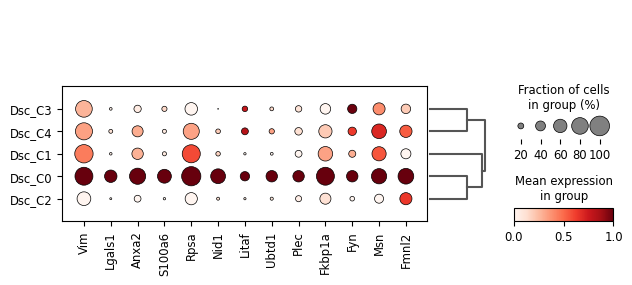

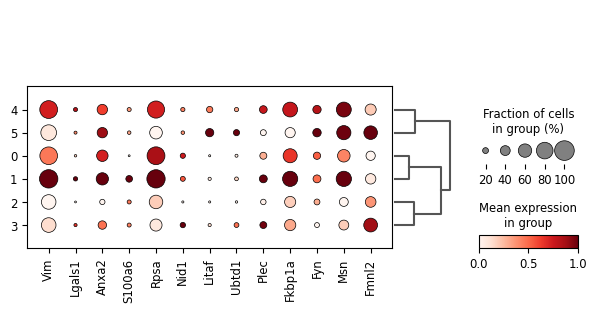

In [68]:
colors = ["#020835", "#3a4891", "#78a1df", '#f9fcf7',  "#af6c81", '#964e5a', "#572936"] #蓝白红
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)
sc.pl.dotplot(adata, ["Vim", "Lgals1", "Anxa2", "S100a6", "Rpsa", "Nid1","Litaf","Ubtd1","Plec","Fkbp1a","Fyn","Msn","Fmnl2"], "Dsc", dendrogram=True, standard_scale = "var" ,edgecolor='black',  # 点的边框颜色
    linewidth=0.5 )
sc.pl.dotplot(adata, ["Vim", "Lgals1", "Anxa2", "S100a6", "Rpsa", "Nid1","Litaf","Ubtd1","Plec","Fkbp1a","Fyn","Msn","Fmnl2"], "leiden_res_ori_0.60", dendrogram=True, standard_scale = "var" ,edgecolor='black',  # 点的边框颜色
    linewidth=0.5 )